# Multi-Campaign Interaction Analysis

This notebook demonstrates how to analyze and compare interaction metrics across multiple D&D campaigns using advanced NLP techniques.

## Features
- Semantic distance analysis across campaigns
- Session novelty comparison
- Topic modeling and transition analysis
- Cross-campaign interaction correlations
- Statistical comparisons and distributions
- **Improved caching system** with interaction-specific cache files

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
import analysis.creativity_metrics as creativity
import analysis.data_loading as dl
import analysis.batch as batch
import os

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create plots directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

## 1. Load and Analyze Multiple Campaigns

First, let's analyze creative metrics across multiple campaigns. We'll start with a small sample for demonstration purposes.

In [33]:
# Analyze interaction metrics across multiple campaigns
interaction_results = batch.analyze_creativity_all_campaigns(
    data_file_path=os.path.join(os.getcwd(),'..', 'data', 'raw-human-games', 'individual_campaigns'),
    max_campaigns=5,
    force_refresh=False,
    show_progress=True
)

print(f"Analyzed {len(interaction_results)} campaigns")
print("\nCampaigns analyzed:")
for campaign_id, results in interaction_results.items():
    meta = results['metadata']
    print(f"  {campaign_id}: {meta['total_messages']} messages, {meta['unique_players']} players")

Analyzed 5 campaigns

Campaigns analyzed:
  10391-guardians-of-gridori: 216 messages, 6 players
  10625-wrath-of-ashardalon: 247 messages, 7 players
  10639-the-crypt-of-the-dreaming-dead: 2162 messages, 9 players
  10672-whispers-of-dissent: 1542 messages, 10 players
  10826-ye-ol-yarn-spun-legend: 715 messages, 8 players


## 2. Aggregate Results for Cross-Campaign Analysis

In [34]:
# Aggregate interaction metrics across all campaigns
aggregated = batch.aggregate_creativity_metrics(interaction_results)

print("=== CROSS-CAMPAIGN INTERACTION SUMMARY ===")
summary = aggregated['summary']
print(f"Total campaigns analyzed: {summary['total_campaigns_analyzed']}")
print(f"Campaigns with semantic analysis: {summary['campaigns_with_semantic_analysis']}")
print(f"Campaigns with novelty analysis: {summary['campaigns_with_novelty_analysis']}")
print(f"Campaigns with topic analysis: {summary['campaigns_with_topic_analysis']}")
print(f"Total messages across all campaigns: {summary['total_messages_across_all_campaigns']}")

# Display cross-campaign statistics
print("\n=== CROSS-CAMPAIGN STATISTICS ===")
for metric_name, stats in aggregated['cross_campaign_stats'].items():
    print(f"\n{metric_name.replace('_', ' ').title()}:")
    print(f"  Mean: {stats['mean']:.4f}")
    print(f"  Std:  {stats['std']:.4f}")
    print(f"  Min:  {stats['min']:.4f}")
    print(f"  Max:  {stats['max']:.4f}")
    print(f"  Campaigns: {stats['campaigns_analyzed']}")

=== CROSS-CAMPAIGN INTERACTION SUMMARY ===
Total campaigns analyzed: 5
Campaigns with semantic analysis: 5
Campaigns with novelty analysis: 0
Campaigns with topic analysis: 5
Total messages across all campaigns: 4882

=== CROSS-CAMPAIGN STATISTICS ===

Semantic Distance:
  Mean: 0.5994
  Std:  0.0317
  Min:  0.5554
  Max:  0.6500
  Campaigns: 5

Topic Change Rate:
  Mean: 0.4729
  Std:  0.3240
  Min:  0.0299
  Max:  0.8300
  Campaigns: 5


## 3. Visualize Creative Metrics Distributions

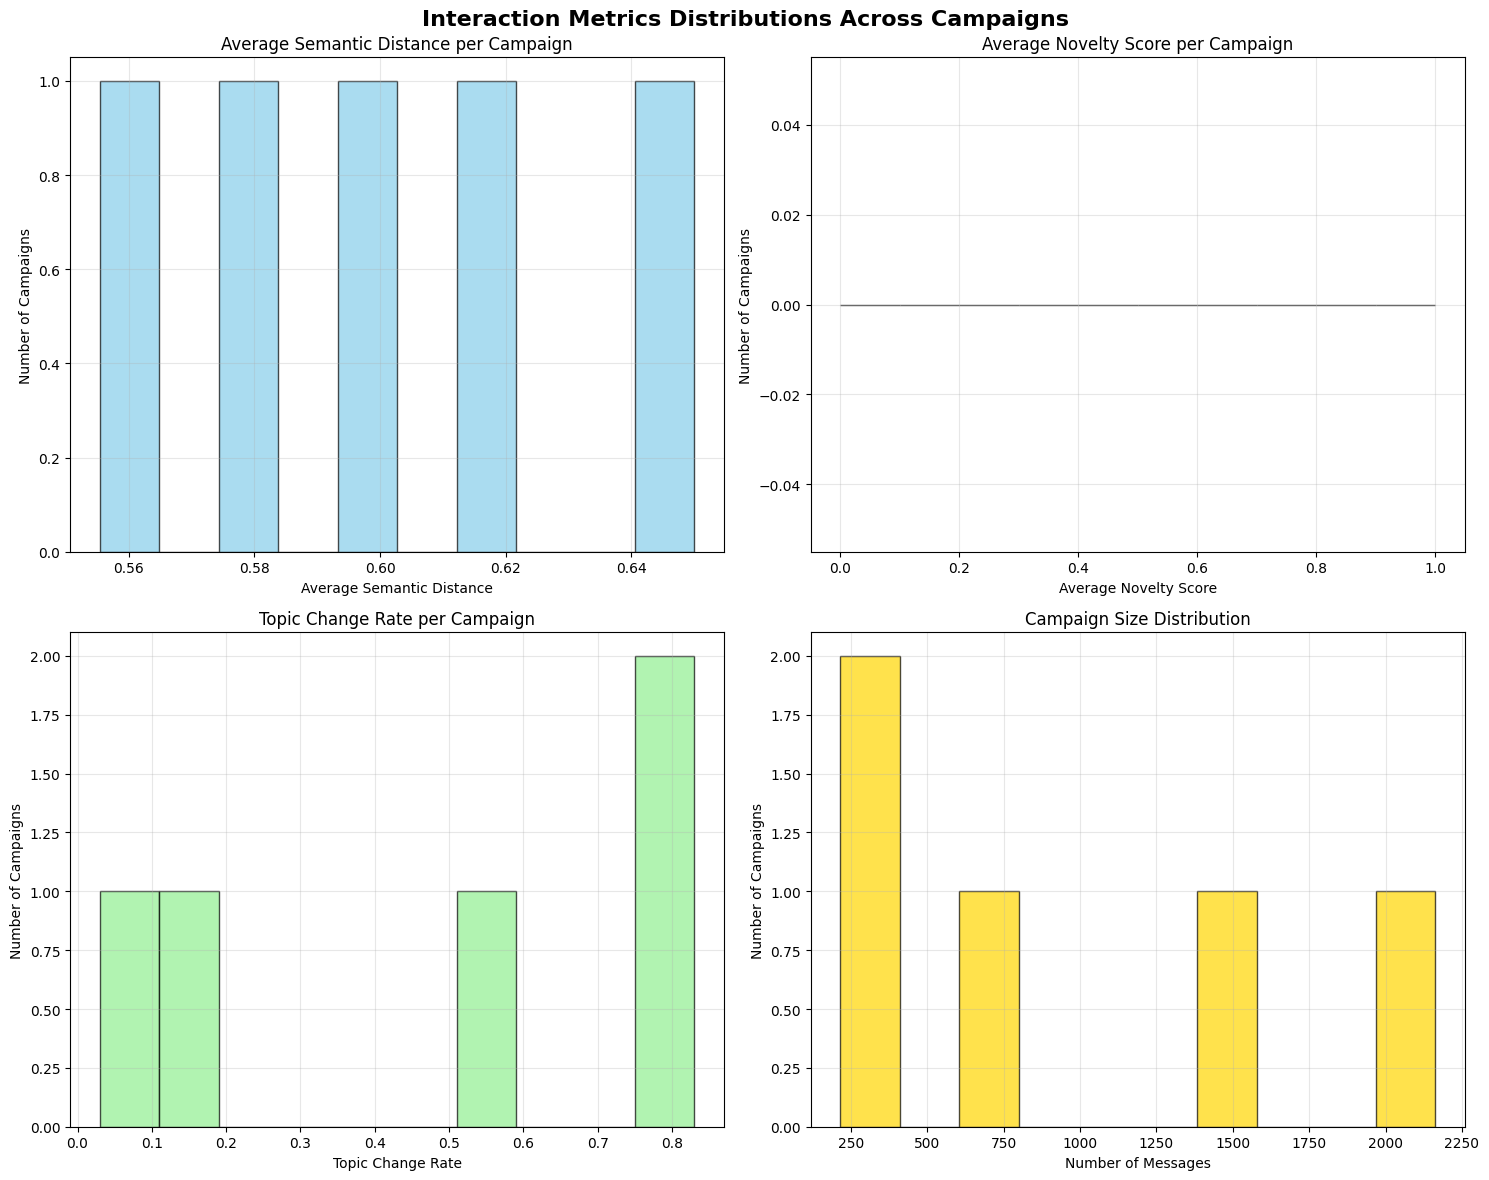

In [35]:
# Plot distributions of interaction metrics
distributions = aggregated['distributions']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Interaction Metrics Distributions Across Campaigns', fontsize=16, fontweight='bold')

# Semantic distances
axes[0, 0].hist(distributions['semantic_distances'], bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Average Semantic Distance per Campaign')
axes[0, 0].set_xlabel('Average Semantic Distance')
axes[0, 0].set_ylabel('Number of Campaigns')
axes[0, 0].grid(True, alpha=0.3)

# Novelty scores
axes[0, 1].hist(distributions['novelty_scores'], bins=10, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Average Novelty Score per Campaign')
axes[0, 1].set_xlabel('Average Novelty Score')
axes[0, 1].set_ylabel('Number of Campaigns')
axes[0, 1].grid(True, alpha=0.3)

# Topic change rates
axes[1, 0].hist(distributions['topic_change_rates'], bins=10, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Topic Change Rate per Campaign')
axes[1, 0].set_xlabel('Topic Change Rate')
axes[1, 0].set_ylabel('Number of Campaigns')
axes[1, 0].grid(True, alpha=0.3)

# Campaign sizes
axes[1, 1].hist(distributions['campaign_sizes'], bins=10, alpha=0.7, color='gold', edgecolor='black')
axes[1, 1].set_title('Campaign Size Distribution')
axes[1, 1].set_xlabel('Number of Messages')
axes[1, 1].set_ylabel('Number of Campaigns')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/interaction_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Campaign-by-Campaign Comparison

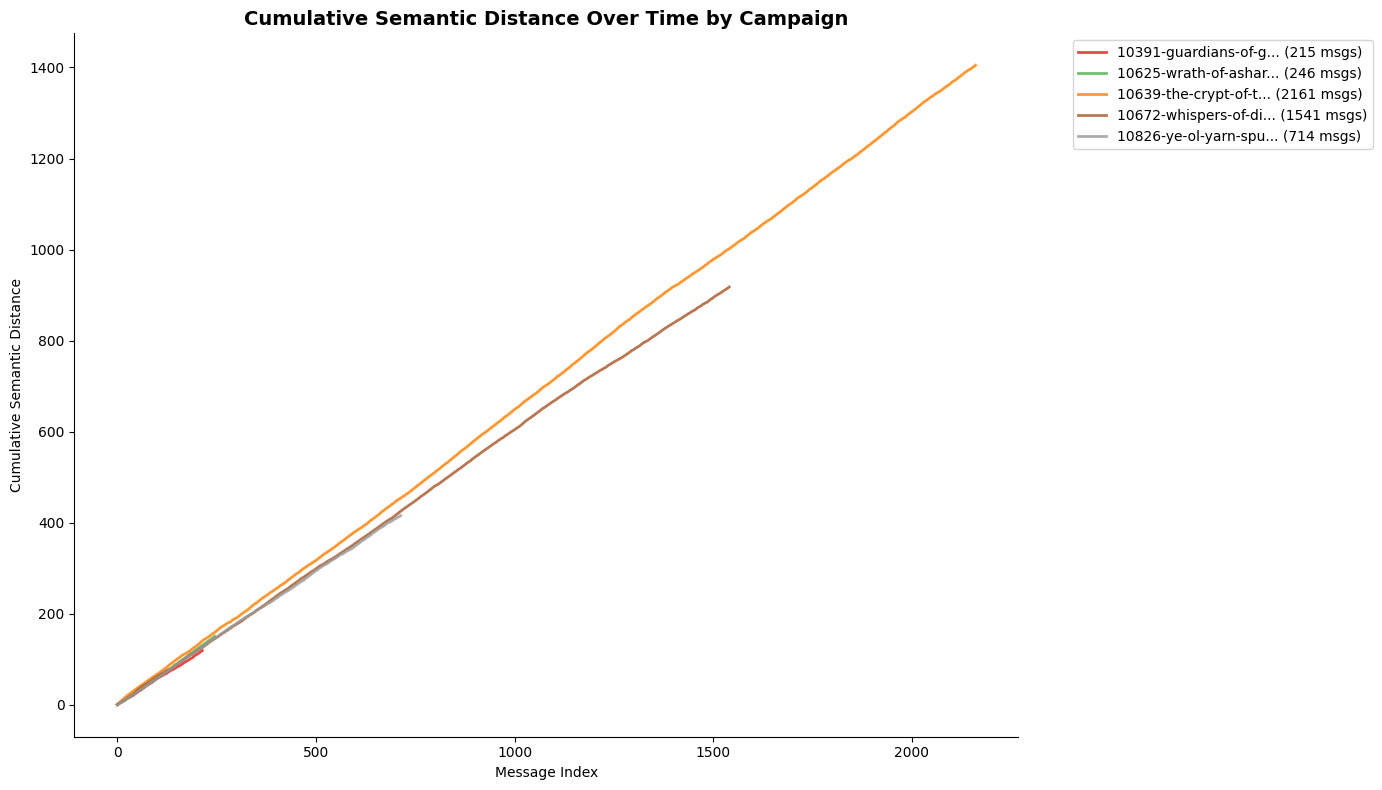

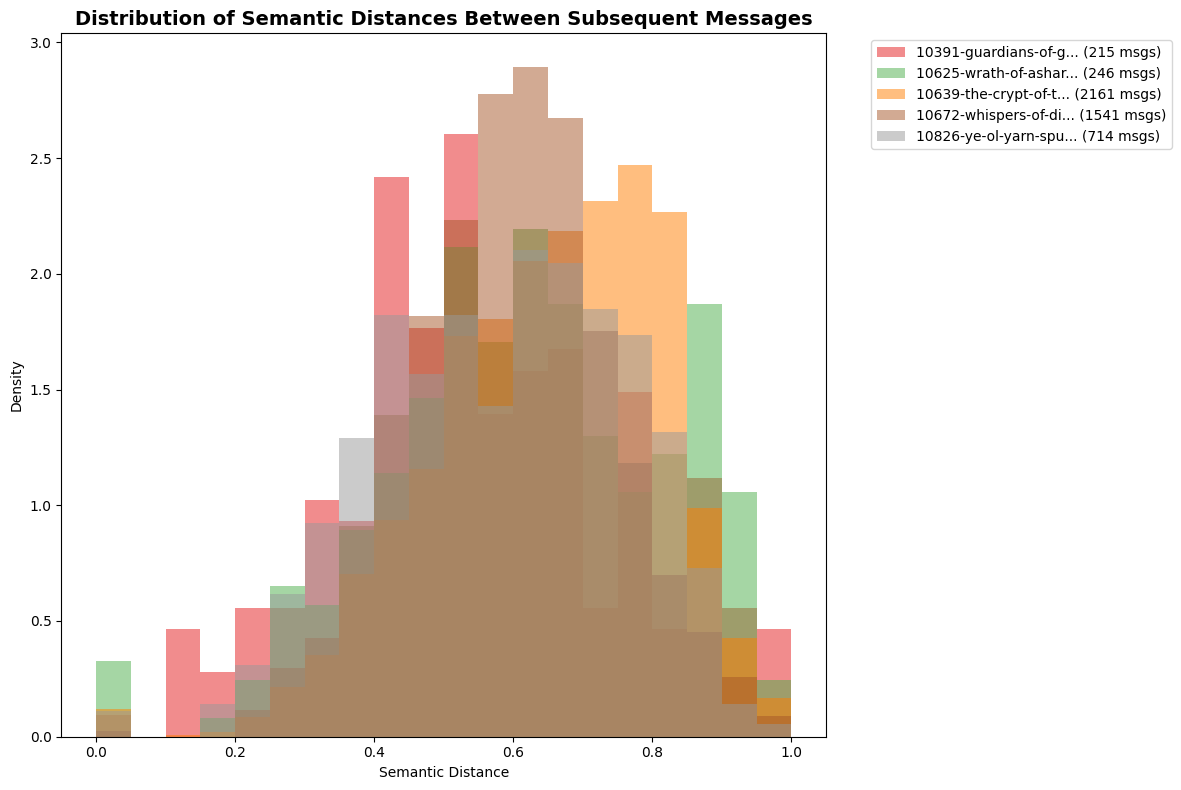

=== CUMULATIVE SEMANTIC DISTANCE SUMMARY ===
10391-guardians-of-gridori:
  Total cumulative distance: 119.4050
  Average per-message distance: 0.5554
  Standard deviation: 0.2021
  Range: 0.0000 to 1.0000
  Messages analyzed: 215
10625-wrath-of-ashardalon:
  Total cumulative distance: 151.0363
  Average per-message distance: 0.6140
  Standard deviation: 0.1990
  Range: 0.0000 to 1.0000
  Messages analyzed: 246
10639-the-crypt-of-the-dreamin...:
  Total cumulative distance: 1404.7500
  Average per-message distance: 0.6500
  Standard deviation: 0.1635
  Range: 0.0000 to 1.0000
  Messages analyzed: 2161
10672-whispers-of-dissent:
  Total cumulative distance: 917.8955
  Average per-message distance: 0.5956
  Standard deviation: 0.1424
  Range: 0.0000 to 1.0000
  Messages analyzed: 1541
10826-ye-ol-yarn-spun-legend:
  Total cumulative distance: 415.6841
  Average per-message distance: 0.5822
  Standard deviation: 0.1768
  Range: 0.0000 to 1.0000
  Messages analyzed: 714


In [36]:
# Campaign-by-Campaign Comparison: Cumulative Semantic Distance Over Time
campaign_summaries = aggregated['campaign_summaries']
campaign_ids = list(campaign_summaries.keys())

# Create cumulative semantic distance plot for all campaigns
plt.figure(figsize=(14, 8))
colors = plt.cm.Set1(np.linspace(0, 1, len(campaign_ids)))

for i, campaign_id in enumerate(campaign_ids):
    results = interaction_results[campaign_id]
    distances = results['semantic_distances']
    
    # Calculate cumulative semantic distance
    distances_array = np.array(distances)
    valid_distances = distances_array[~np.isnan(distances_array)]
    
    cumulative_distances = np.cumsum(valid_distances)
    x_values = range(len(cumulative_distances))
    
    # Plot cumulative semantic distance for this campaign
    campaign_label = campaign_id[:20] + '...' if len(campaign_id) > 20 else campaign_id
    plt.plot(
        x_values,
        cumulative_distances,
        color=colors[i],
        linewidth=2,
        alpha=0.8,
        label=f'{campaign_label} ({len(valid_distances)} msgs)'
    )

plt.title('Cumulative Semantic Distance Over Time by Campaign', fontsize=14, fontweight='bold')
plt.xlabel('Message Index')
plt.ylabel('Cumulative Semantic Distance')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/cumulative_semantic_distance.png', dpi=300, bbox_inches='tight')
sns.despine()
plt.show()

# Second plot: Distribution of distances between subsequent messages
plt.figure(figsize=(12, 8))

for i, campaign_id in enumerate(campaign_ids):
    results = interaction_results[campaign_id]
    distances = results['semantic_distances']
    
    # Get valid distances (remove NaN values)
    distances_array = np.array(distances)
    valid_distances = distances_array[~np.isnan(distances_array)]
    
    # Create histogram for this campaign
    campaign_label = campaign_id[:20] + '...' if len(campaign_id) > 20 else campaign_id
    plt.hist(
        valid_distances,
        bins=20,
        alpha=0.5,
        color=colors[i],
        label=f'{campaign_label} ({len(valid_distances)} msgs)',
        density=True)

plt.title('Distribution of Semantic Distances Between Subsequent Messages', fontsize=14, fontweight='bold')
plt.xlabel('Semantic Distance')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plots/semantic_distance_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics for both plots
print("=== CUMULATIVE SEMANTIC DISTANCE SUMMARY ===")
for campaign_id in campaign_ids:
    results = interaction_results[campaign_id]
    distances = results['semantic_distances']
    distances_array = np.array(distances)
    valid_distances = distances_array[~np.isnan(distances_array)]
    
    total_distance = np.sum(valid_distances)
    avg_distance = np.mean(valid_distances)
    std_distance = np.std(valid_distances)
    min_distance = np.min(valid_distances)
    max_distance = np.max(valid_distances)
    campaign_short = campaign_id[:30] + '...' if len(campaign_id) > 30 else campaign_id
    print(f"{campaign_short}:")
    print(f"  Total cumulative distance: {total_distance:.4f}")
    print(f"  Average per-message distance: {avg_distance:.4f}")
    print(f"  Standard deviation: {std_distance:.4f}")
    print(f"  Range: {min_distance:.4f} to {max_distance:.4f}")
    print(f"  Messages analyzed: {len(valid_distances)}")

## 6. Detailed Campaign Analysis

Let's examine the creative metrics for each campaign in detail.

In [ ]:
# Detailed analysis of individual campaigns
print("=== DETAILED CAMPAIGN ANALYSIS ===")

for campaign_id, results in interaction_results.items():
    print(f"\n--- Campaign: {campaign_id} ---")
    
    # Metadata
    meta = results['metadata']
    print(f"Total messages: {meta['total_messages']}")
    print(f"Unique players: {meta['unique_players']}")
    print(f"Date range: {meta['date_range']['start'][:10]} to {meta['date_range']['end'][:10]}")
    
    # Semantic analysis
    distances = results['semantic_distances']
    print(f"Semantic distances: avg={np.mean(distances):.4f}, std={np.std(distances):.4f}")
    print(f"  Range: {np.min(distances):.4f} to {np.max(distances):.4f}")
    
    # Novelty analysis - session_novelty is a DataFrame, but may be empty
    novelty_df = results['session_novelty']
    if novelty_df is not None and not novelty_df.empty:
        mean_distances = novelty_df['mean_distance']
        print(f"Session novelty: avg={np.mean(mean_distances):.4f}, std={np.std(mean_distances):.4f}")
        print(f"  Range: {np.min(mean_distances):.4f} to {np.max(mean_distances):.4f}")
        print(f"  Sessions analyzed: {len(novelty_df)}")
    else:
        print("Session novelty: No sessions with >1 message")
    
    # Topic analysis
    topics = results['topic_model']
    if topics and 'topics' in topics:
        unique_topics = len(set(topics['topics']))
        print(f"Topics discovered: {unique_topics}")
        
        change_rate = results['topic_change_rate']
        if change_rate and 'overall_rate' in change_rate:
            print(f"Topic change rate: {change_rate['overall_rate']:.4f}")
    else:
        print("Topic analysis: Not available")

## 7. Divergent Semantic Integration (DSI) Time Series Analysis

DSI measures narrative creativity by analyzing semantic divergence between ideas within text scenes. Based on Johnson et al. (2023) methodology using BERT layers 6 and 7.

In [ ]:
# DSI Time Series Analysis
# Get the same campaign IDs we're analyzing
campaign_ids = list(interaction_results.keys())
num_campaigns_to_compare = len(campaign_ids)

# Calculate DSI for the campaigns being analyzed
dsi_results = batch.analyze_dsi_all_campaigns(
    max_campaigns=2,
    show_progress=True
)

In [ ]:
# Create DSI time series plot
plt.figure(figsize=(14, 8))

colors = plt.cm.Set1(np.linspace(0, 1, len(campaign_ids)))
plotted_campaigns = 0

for i, campaign_id in enumerate(campaign_ids):
    if campaign_id in dsi_results:
        dsi_data = dsi_results[campaign_id]
        scene_scores = dsi_data['scene_dsi_scores']
        
        # Filter out NaN values for plotting
        valid_scores = [(j+1, score) for j, score in enumerate(scene_scores) if not np.isnan(score)]
        
        if valid_scores:
            scene_numbers, scores = zip(*valid_scores)
            
            # Create campaign label
            campaign_label = campaign_id[:15] + '...' if len(campaign_id) > 15 else campaign_id
            avg_dsi = dsi_data['time_averaged_dsi']
            
            plt.plot(scene_numbers, scores, 
                    label=f'{campaign_label} (avg: {avg_dsi:.3f})',
                    linewidth=2, alpha=0.5, color=colors[i],
                    marker='o', markersize=3)
            plotted_campaigns += 1

plt.xlabel('Scene Number')
plt.ylabel('DSI Score (Semantic Divergence)')
plt.title('Narrative Creativity (DSI) Over Time - Campaign Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('plots/dsi_timeseries_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# DSI Summary Statistics
print("="*50)
print("DSI SUMMARY STATISTICS")
print("="*50)

dsi_scores_all = []
campaign_summaries = []

for i, campaign_id in enumerate(campaign_ids):
    if campaign_id in dsi_results:
        dsi_data = dsi_results[campaign_id]
        avg_dsi = dsi_data['time_averaged_dsi']
        scene_count = dsi_data['scene_count']
        valid_scores_count = dsi_data['valid_scores_count']
        
        campaign_short = campaign_id[:40] + '...' if len(campaign_id) > 40 else campaign_id
        
        print(f"\nCampaign {i+1}: {campaign_short}")
        print(f"  Average DSI: {avg_dsi:.3f}")
        print(f"  Total scenes: {scene_count}")
        print(f"  Valid DSI scores: {valid_scores_count}")
        
        if not np.isnan(avg_dsi):
            dsi_scores_all.append(avg_dsi)
            campaign_summaries.append({
                'campaign_id': campaign_id,
                'avg_dsi': avg_dsi,
                'scene_count': scene_count,
                'valid_scores': valid_scores_count
            })

# Overall statistics
print(f"\n" + "="*30)
print("OVERALL DSI STATISTICS")
print("="*30)
print(f"Campaigns with valid DSI: {len(dsi_scores_all)}")
print(f"Mean DSI across campaigns: {np.mean(dsi_scores_all):.3f}")
print(f"Standard deviation: {np.std(dsi_scores_all):.3f}")
print(f"DSI range: {np.min(dsi_scores_all):.3f} - {np.max(dsi_scores_all):.3f}")

# DSI interpretation guide
print(f"\n" + "="*40)
print("DSI INTERPRETATION GUIDE")
print("="*40)
print("DSI scores measure semantic divergence between ideas:")
print("• Higher scores (0.6-0.8): More creative, diverse narrative")
print("• Medium scores (0.4-0.6): Moderate semantic variety")
print("• Lower scores (0.3-0.4): More repetitive or focused content")
print("• Scores outside 0.3-0.8 may indicate data processing issues")

## 8. Expanding the Analysis

To analyze more campaigns, simply increase the `max_campaigns` parameter in the analysis function.

In [ ]:
# Example: Analyze more campaigns

# To analyze more campaigns, simply increase the max_campaigns parameter:
"""
larger_analysis = batch.analyze_creativity_all_campaigns(
    data_file_path=os.path.join(os.getcwd(),'..', 'data', 'raw-human-games', 'individual_campaigns'),
    max_campaigns=20,
    force_refresh=False,
    show_progress=True
)

larger_aggregated = batch.aggregate_creativity_metrics(larger_analysis)
print(f"Analyzed {len(larger_analysis)} campaigns with expanded dataset")
"""

print("To analyze more campaigns, uncomment and run the code above.")